In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

In [16]:
plt.style.use(['science'])
plt.rcParams.update({'figure.dpi': '200'})

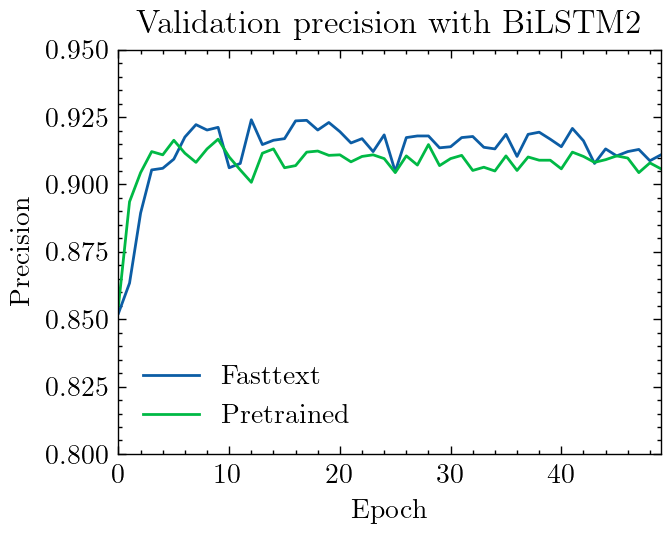

In [17]:
paths = ['output_data/run-Apr06_15-06-30_notoken_fasttext_bilstm2-tag-val_precision.csv',
         'output_data/run-Apr06_16-14-39_antoineedys-macbook-pro.home-tag-val_precision.csv']

labels = ['Fasttext', 'Pretrained']

for path in paths:
    data = pd.read_csv(path)
    plt.plot(data['Step'], data['Value'], label=labels.pop(0))

plt.ylim(0.8, 0.95)
plt.xlim(0, 49)
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.title('Validation precision with BiLSTM2')
plt.show()